# 曾正豪 0716325

In [26]:
import random
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

## Data Input & Data Preprocessing
    在資料讀取這邊，我直接使用了python的檔案讀取功能，將檔案內的資料一行一行讀取出來，並且使用字串的split功能將每一行的各個feature提取出來將其放入x以及y中。
    接下來使用內建的shuffle將資料順序打亂

In [27]:
x = []
y = []
with open('seeds_dataset.txt', newline='') as f:
    lines = f.readlines()
    for line in lines:
        line_split = line.split()
        x.append([])
        for i in range(7):
            x[-1].append(float(line_split[i]))
        y.append(int(line_split[7]) - 1)

temp = list(zip(x, y))
random.shuffle(temp)
x, y = zip(*temp)

## K-means Clustering
在這邊，我定義了3個函式
### l2_distance(x:list, y:list) -> float
這是用來計算兩個向量之間的L2 distance
### K_means_clustering(data_points:list, k: int) -> list:
這個是我k-means的本體，我一開始在寫的時候以為是這部分完全不能使用任何套件，裡面的變數完全使用python內建型別來計算，所以計算速度會蠻慢的。後面寫完之後才發現可以用numpy QQ。

在一開始隨機初始化k個點時，我是從原本的資料集中隨機取出k個點作為起始點:
```python
for i in range(k):
    c[i] = data_points[random.randint(0, n-1)]
```

在assignment step這邊，我將所有的data point座標，找出他們最近的cluster並assign給他該cluster的編號
```python
for i in range(n):
    closet = 0
    distance = 9999999
    for j in range(k):
        new_distance = l2_distance(data_points[i], c[j])
        if new_distance < distance:
            closet = j
            distance = new_distance
    new_belong[i] = closet
```

在update step這邊，我會將所有cluster的新位置更新成所有屬於該cluster的data point的平均值
```python
for i in range(k):
    num = 0
    c[i] = [0]*dimension
    for j in range(n):
        if new_belong[j] == i:
            num += 1
            for l in range(dimension):
                c[i][l] += data_points[j][l]
    for l in range(dimension):
        c[i][l] = c[i][l] if num == 0 else c[i][l] / num
```
### K_means_label_mapping(x:list, y: list) -> list:
這是用來尋找如何將k-means的label最佳化地對應到分類的label的，這問題其實可以簡化成任務分配問題，我們定義一個k*k的矩陣mat，mat[i][j]代表原資料中，被k-means分配到label i，但其true label是j的個數。目標是要找到，每一個row各取一個element，但取出的element的column不能有相同的，且這些element的總和要最大。貪心算法可以在線性時間內得出次優解，匈牙利演算法可以在多項式時間內解出最佳解，但我懶惰所以就直接用窮舉法把所有可能列出，找出最佳解。

True label: (0, 2, 0, 2, 0, 1, 0, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 0, 0, 1, 1, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 0, 1, 2, 2, 2, 0, 2, 1, 0, 1, 0, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 1, 0, 1, 0, 0, 2)
Predicted label from K-means: [1, 0, 2, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0, 2, 2, 1, 0, 1, 1, 2, 2, 1, 0, 1, 1, 0, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1,

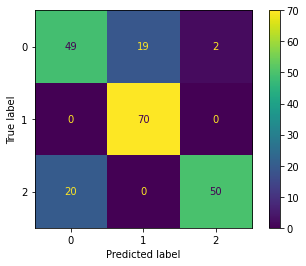

              precision    recall  f1-score   support

           0       0.71      0.70      0.71        70
           1       0.79      1.00      0.88        70
           2       0.96      0.71      0.82        70

    accuracy                           0.80       210
   macro avg       0.82      0.80      0.80       210
weighted avg       0.82      0.80      0.80       210



In [28]:
def l2_distance(x:list, y:list) -> float:
    sum = 0.0
    for i in range(len(x)):
        sum += (x[i] - y[i]) ** 2
    return sum ** 0.5

def K_means_clustering(data_points:list, k: int) -> list:
    n = len(data_points)
    dimension = len(data_points[0])
    belong = [0] * n
    new_belong = [0] * n
    stop = False
    c = [[0,0,0],[0,0,0],[0,0,0]]

    for i in range(k):
        c[i] = data_points[random.randint(0, n-1)]

    while not stop:
        for i in range(n):
            closet = 0
            distance = 9999999
            for j in range(k):
                new_distance = l2_distance(data_points[i], c[j])
                if new_distance < distance:
                    closet = j
                    distance = new_distance
            new_belong[i] = closet
        
        for i in range(k):
            num = 0
            c[i] = [0]*dimension
            for j in range(n):
                if new_belong[j] == i:
                    num += 1
                    for l in range(dimension):
                        c[i][l] += data_points[j][l]
            for l in range(dimension):
                c[i][l] = c[i][l] if num == 0 else c[i][l] / num
        stop = True
        for i in range(n):
            if belong[i] != new_belong[i]:
                stop = False
        #print(new_belong)
        belong = new_belong
    return belong

def K_means_label_mapping(x:list, y: list) -> list:
    mapping = {0:0, 1:1, 2:2}
    table = [[0 for i in range(3)]for i in range(3)]
    for i in range(len(x)):
        table[ x[i] ][ y[i] ] += 1
    
    max_val = table[0][0] + table[1][1] + table[2][2]

    for i in range(3):
        for j in range(3):
            for k in range(3):
                new_val = table[0][i] + table[1][j] + table[2][k]
                if new_val > max_val and i != j and j != k and i != k:
                    mapping[0] = i
                    mapping[1] = j
                    mapping[2] = k
                    max_val = new_val
    return mapping

pred = K_means_clustering(x,3)
mapping = K_means_label_mapping(pred, y)
print('True label:',y)

print('Predicted label from K-means:',pred)
print('\nThe mapping relation:',mapping)
for i in range(len(pred)):
    pred[i] = mapping[pred[i]]
print('\nPredicted label from K-means after mapping:',pred)

CM = confusion_matrix(y, pred)
report = classification_report(y, pred)
ConfusionMatrixDisplay(confusion_matrix=CM).plot()
plt.show()
print(report)

# Questions - K-means Clustering
### Choose two features to execute your K-means function and draw a scatter plot with the computed centers and the predicted label for each instance.

在這邊，我取了第1以及第7的feature出來，並將其丟入K-means當中，最後根據這些點所屬的cluster將其依不同顏色繪出，黑點為該cluster的中心點位

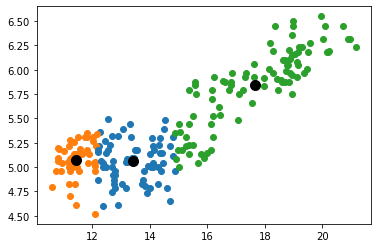

In [35]:
x = []
y = []
with open('seeds_dataset.txt', newline='') as f:
    lines = f.readlines()
    for line in lines:
        line_split = line.split()
        x.append([])
        x[-1].append(float(line_split[0]))
        x[-1].append(float(line_split[6]))
        y.append(int(line_split[7]) - 1)
pred = K_means_clustering(x,3)

avg = [[0,0], [0,0], [0,0]]
cnt = [0,0,0]

for idx in range(len(pred)):
    if pred[idx] == 0:
        plt.scatter(x[idx][0], x[idx][1], c = '#1f77b4')
        avg[0][0] += x[idx][0]
        avg[0][1] += x[idx][1]
        cnt[0] += 1
    elif pred[idx] == 1:
        plt.scatter(x[idx][0], x[idx][1], c = '#ff7f0e')
        avg[1][0] += x[idx][0]
        avg[1][1] += x[idx][1]
        cnt[1] += 1
    elif pred[idx] == 2:
        plt.scatter(x[idx][0], x[idx][1], c = '#2ca02c')
        avg[2][0] += x[idx][0]
        avg[2][1] += x[idx][1]
        cnt[2] += 1

avg[0][0] /= cnt[0]
avg[0][1] /= cnt[0]
avg[1][0] /= cnt[1]
avg[1][1] /= cnt[1]
avg[2][0] /= cnt[2]
avg[2][1] /= cnt[2]

plt.scatter(avg[0][0], avg[0][1], c = '#000000', s=100)
plt.scatter(avg[1][0], avg[1][1], c = '#000000', s=100)
plt.scatter(avg[2][0], avg[2][1], c = '#000000', s=100)

plt.show()